# Boston Marathon project

Using results 2014 database with link: https://github.com/llimllib/bostonmarathon/blob/master/results/2014/results.csv 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
# import database
df = pd.read_csv('results 2014.csv')
pd.options.display.max_columns=None
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [4]:
df.shape

(31984, 21)

# Cleaning data 

In [5]:
#df.info()
print("Count of null entries")
display(df.isnull().sum())

Count of null entries


10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [6]:
df.drop("ctz", axis=1,inplace=True)

In [7]:
df.state.fillna("-", inplace=True)

In [8]:
# Kiểm tra dữ liệu cột '10k'
#df['10k'].value_counts(dropna=False)

In [9]:
df['10k'].replace("-", 0, inplace=True)

In [10]:
df['25k'].replace("-", 0, inplace=True)
df['35k'].replace("-", 0, inplace=True)
df['30k'].replace("-", 0, inplace=True)
df['5k'].replace("-", 0, inplace=True)
df['half'].replace("-", 0, inplace=True)
df['20k'].replace("-", 0, inplace=True)
df['40k'].replace("-", 0, inplace=True)

In [11]:
from sklearn import preprocessing
CategoricalEncoder = preprocessing.LabelEncoder()
CategoricalEncoder.fit(df.gender)
df.gender = CategoricalEncoder.transform(df.gender)

In [12]:
# View the labels 
print(list(CategoricalEncoder.classes_))

for i, classes in enumerate(CategoricalEncoder.classes_):
    print("Labels:",classes + ", Category value:",i )

['F', 'M']
Labels: F, Category value: 0
Labels: M, Category value: 1


In [13]:
def clean_bib(bib_string):
    known_prefixes = 'FW'
    if bib_string[0] in known_prefixes:
        return int(bib_string[1:])
    else:
        return int(bib_string)

In [14]:
df['bib'] = df['bib'].apply(clean_bib)

In [19]:
#df['bib'].value_counts(dropna=False)
#df.info()

In [15]:
df = df.convert_objects(convert_numeric=True)

In [17]:
df.describe()
#df.to_csv('results 2014 clear.csv')

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.718298,1932.563032,132.709723,0.550807,42.407079,242.997314,18147.632191,8051.044741,196.648339,15939.587825,9.275658,164.365402,25.713685,111.413195,105.543107,228.722255
std,9.189281,1715.228694,27.758446,0.497420,11.316496,52.300431,10395.933180,4754.005626,42.444377,9232.978224,1.992486,34.427329,4.447068,21.692902,20.209809,49.775681
min,0.000000,1.000000,0.000000,0.000000,18.000000,80.600000,1.000000,1.000000,0.000000,1.000000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.370000,610.000000,115.100000,0.000000,33.000000,205.527500,9118.750000,3972.000000,167.050000,7943.750000,7.850000,140.580000,22.630000,96.750000,91.700000,193.700000
50%,50.320000,1425.000000,128.670000,1.000000,42.000000,232.370000,18280.500000,7970.000000,188.120000,15939.500000,8.870000,157.700000,25.080000,107.775000,102.100000,218.780000
75%,57.150000,2611.000000,147.555000,1.000000,50.000000,273.235000,27218.250000,11968.000000,220.120000,23935.250000,10.430000,182.785000,28.455000,123.030000,116.480000,257.405000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,35912.000000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


# visualizations

64
63


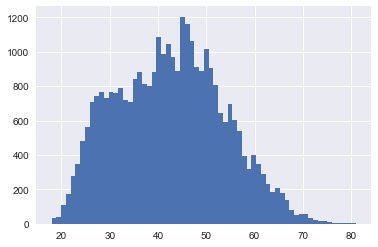

In [20]:
print(len(df['age'].unique()))
print(df['age'].max() - df['age'].min())
df['age'].hist(bins=64)

In [21]:
df['gender'].value_counts()

1    17617
0    14367
Name: gender, dtype: int64

[]

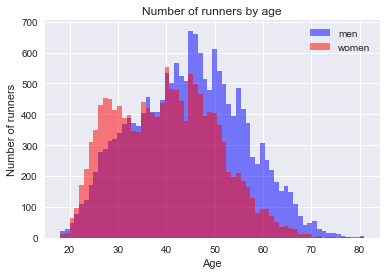

In [22]:
df[df['gender']==True]['age'].hist(bins=64, color='b', alpha=0.5)
df[df['gender']==False]['age'].hist(bins=64, color='r', alpha=0.5)
plt.legend(['men','women'])
plt.xlabel('Age')
plt.ylabel('Number of runners')
plt.title('Number of runners by age')
plt.plot()

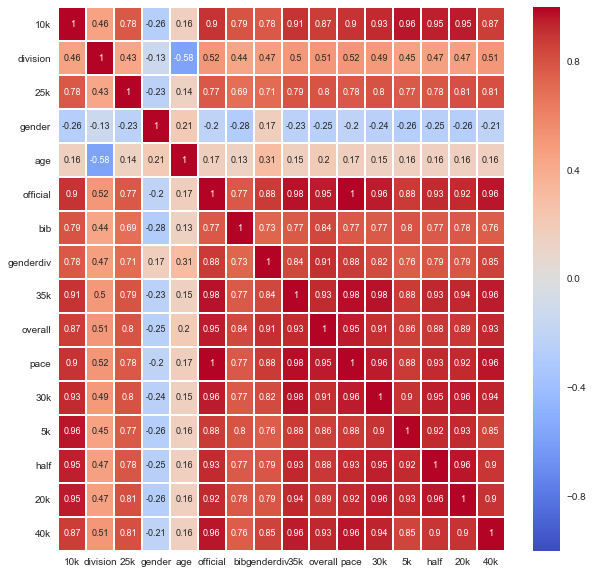

In [23]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={'size': 9})

division, gender, age, bid, genderdiv có sự tương quan thấp

# Analysis

In [24]:
outliers_df = df[['bib','age','gender','division','5k','10k','20k','half','25k','30k','35k','40k']]
outliers_df.head().T


,0,1,2,3,4
bib,1.00,1.00,2.00,2.00,3.00
age,47.00,33.00,41.00,24.00,40.00
gender,1.00,0.00,1.00,0.00,1.00
division,8.00,1.00,1.00,3.00,2.00
5k,8.02,16.22,7.75,16.20,8.02
10k,17.37,32.58,16.62,32.57,17.12
20k,37.65,65.83,36.10,65.83,36.58
half,39.72,69.47,38.03,69.47,38.60
25k,47.67,82.43,45.80,82.43,46.37
30k,59.18,99.33,56.45,99.33,57.03


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
X_outliers  = StandardScaler().fit_transform(outliers_df)
#outliers_df.info()


In [27]:
print(outliers_df.shape)
print(X_outliers.shape)

(31984, 12)
(31984, 12)


In [28]:
model = KMeans(n_clusters = 3, max_iter=10, n_jobs=-1)
model.fit(X_outliers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
from sklearn import decomposition

[]

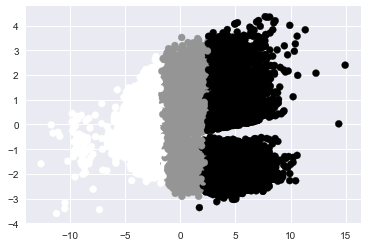

In [30]:
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X_outliers)
plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_)
plt.plot()

In [31]:
outliers_df[X_pca[:,0] > 10]

,bib,age,gender,division,5k,10k,20k,half,25k,30k,35k,40k
7567,8626,52,1,2468,46.98,94.83,196.12,207.22,245.97,296.03,345.72,395.22
15348,17548,21,0,6950,42.95,88.23,187.62,198.45,238.35,291.85,339.53,392.10
17284,19764,62,1,886,86.95,112.38,164.03,169.60,190.03,217.27,249.47,283.68
20548,23451,48,0,2285,45.68,91.08,185.78,196.02,234.53,283.78,333.03,383.43
22191,25304,37,0,6979,39.00,81.80,181.65,192.67,240.02,300.73,363.47,433.28
22197,25310,52,1,2475,46.47,102.82,224.35,236.67,289.02,367.20,439.82,508.17
22285,25413,61,1,1108,43.23,88.03,189.02,198.40,241.57,297.30,356.23,406.10
22290,25419,69,1,535,51.98,94.98,189.58,201.25,243.77,299.68,356.35,408.53
22555,25710,32,0,6937,41.35,85.63,180.87,191.05,230.35,282.13,334.17,384.33
23278,26459,33,0,6948,40.28,83.27,184.25,195.28,234.50,290.22,341.72,391.73


In [34]:
outliers_df  = outliers_df.loc[X_pca[:,0] < 10]
outliers_df.shape

(31970, 12)

[]

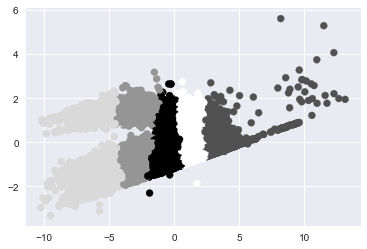

In [35]:
X_outliers  = StandardScaler().fit_transform(outliers_df.drop(['bib', 'age', 'gender'], axis=1))
model = KMeans(n_clusters = 5, max_iter=5, n_jobs=-1, verbose=True)
model.fit(X_outliers)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_outliers)
plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_)
plt.plot()

[]

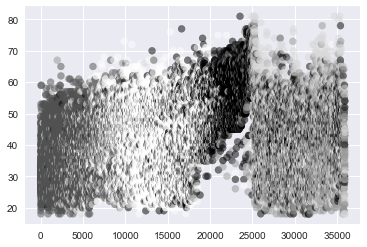

In [37]:
plt.scatter(outliers_df['bib'], outliers_df['age'], alpha=0.5, c=model.labels_)
plt.plot()